In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('result/res.csv',index_col=0) 

In [3]:
df.loc[df.index % 2 == 0, 'seed'] = 1

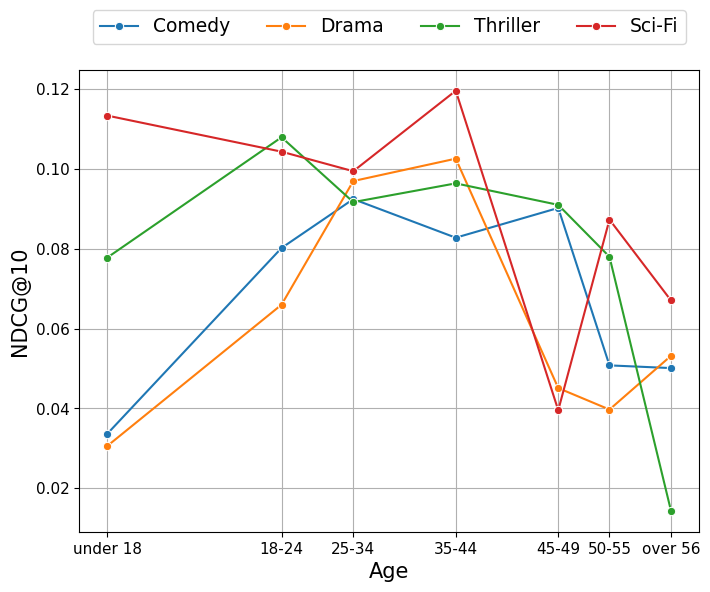

In [24]:
plt.figure(figsize=(8, 6))

# Create the plot
line_plot = sns.lineplot(x='age', y='test_Y_NDCG_10', hue='scenario', data=df[(df['training_setting'] == "single")& df['seed'] == 1],marker="o")

# Customize the legend labels
new_labels = ['Comedy', 'Drama', 'Thriller', 'Sci-Fi']  # replace with your custom labels
handles, _ = line_plot.get_legend_handles_labels()
line_plot.legend(handles=handles, labels=new_labels, bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=4,fontsize=13.5)

# Show grid and plot
xticks_labels = ['under 18', '18-24', '25-34', '35-44', '45-49', '50-55', 'over 56']
xticks_positions = [1, 18, 25, 35, 45, 50, 56]
plt.xticks(ticks=xticks_positions, labels=xticks_labels,fontsize=11) 
plt.yticks(fontsize=11)   
# plt.title("SR recommendation results for different age groups")
plt.xlabel("Age", fontsize=15)
plt.ylabel("NDCG@10", fontsize=15)
plt.grid(True)
plt.show()


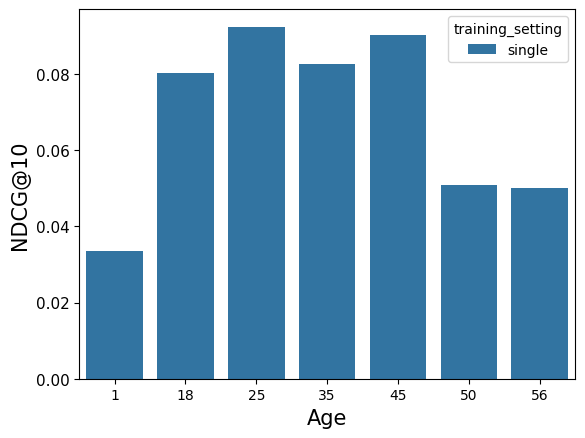

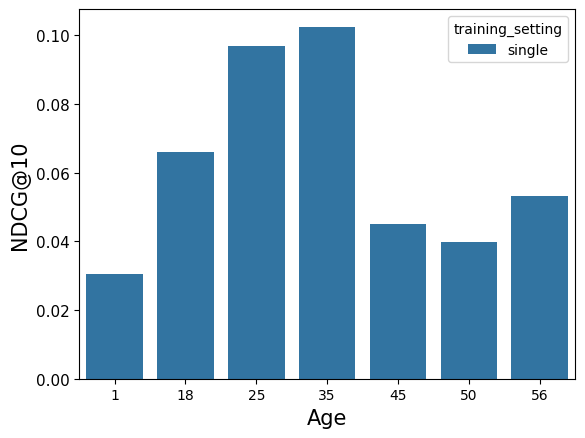

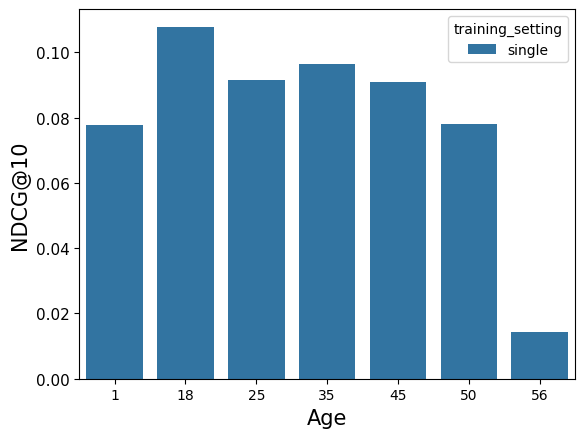

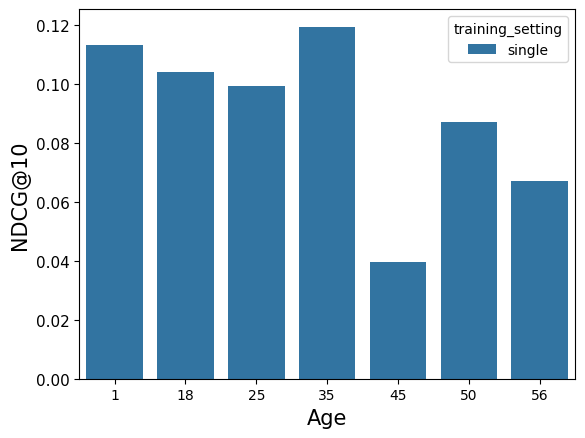

In [8]:
for scenario in df['scenario'].unique():
    sns.barplot(x='age',y='test_Y_NDCG_10',hue='training_setting',data=df[(df['scenario']==scenario)&(df['training_setting']=="single")])
    xticks_labels = ['under 18', '18-24', '25-34', '35-44', '45-49', '50-55', 'over 56']
    # xticks_positions = [1, 18, 25, 35, 45, 50, 56]
    # plt.xticks(ticks=xticks_positions, labels=xticks_labels,fontsize=11) 
    plt.yticks(fontsize=11)   
    # plt.title("SR recommendation results for different age groups")
    plt.xlabel("Age", fontsize=15)
    plt.ylabel("NDCG@10", fontsize=15)
    plt.show()
    
# scenario = "action_comedy"
# sns.lineplot(x='age',y='test_Y_NDCG_10',hue='training_setting',data=df[df['scenario']==scenario])
# plt.show()

([<matplotlib.axis.XTick at 0x72f6320ea0a0>,
 [Text(1, 0, '1'),
  Text(18, 0, '18'),
  Text(25, 0, '25'),
  Text(35, 0, '35'),
  Text(45, 0, '45'),
  Text(50, 0, '50'),
  Text(56, 0, '56')])

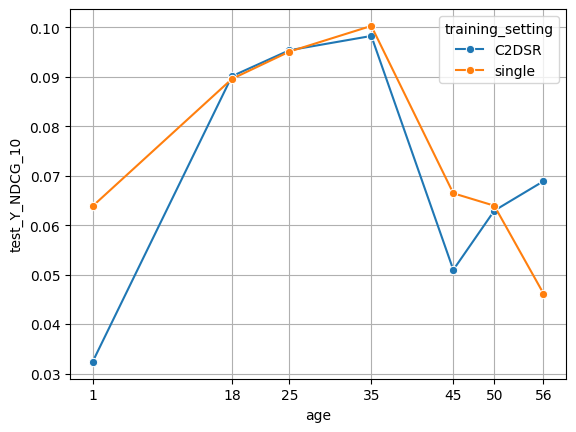

In [41]:
sns.lineplot(x='age',y='test_Y_NDCG_10',hue='training_setting',data=df.groupby(['age','training_setting'])['test_Y_NDCG_10'].mean().reset_index(),marker='o')
plt.grid(True)
plt.xticks([1, 18, 25, 35, 45, 50, 56])

Text(0, 0.5, 'NDCG@10')

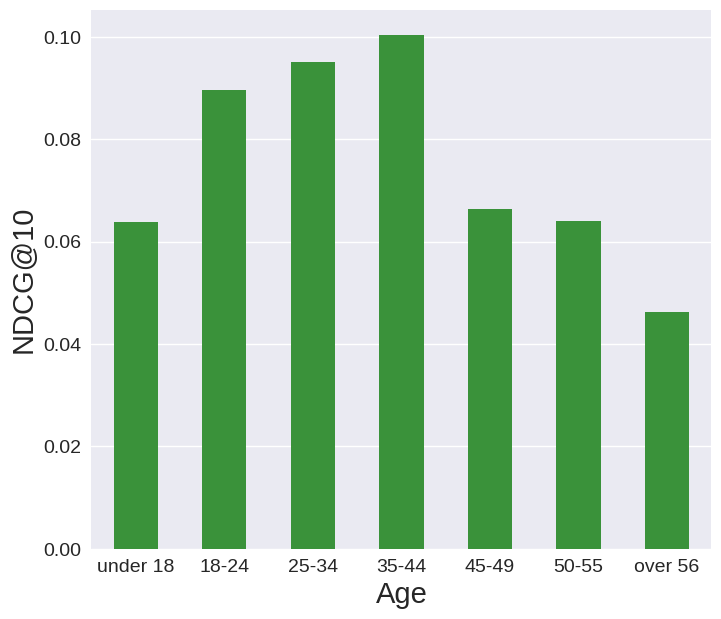

In [39]:
plt.style.use("seaborn-v0_8")
plt.figure(figsize=(8, 7))
colors = sns.color_palette("tab10")
sns.barplot(x='age',y='test_Y_NDCG_10',data=df[df['training_setting'] == "single"].groupby(['age','training_setting'])['test_Y_NDCG_10'].mean().reset_index(),width=0.5,color=colors[2])

# plt.title("SR recommendation performance under different age groups",fontsize=15)
xticks_labels = ['under 18', '18-24', '25-34', '35-44', '45-49', '50-55', 'over 56']
xticks_positions = range(0,7)
plt.xticks(ticks=xticks_positions, labels=xticks_labels,fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Age",fontsize=21)
plt.ylabel("NDCG@10",fontsize=21)